# Knife Edge Measurements Testing
---
## Module near field image

In [1]:
%load_ext autoreload
%autoreload 2

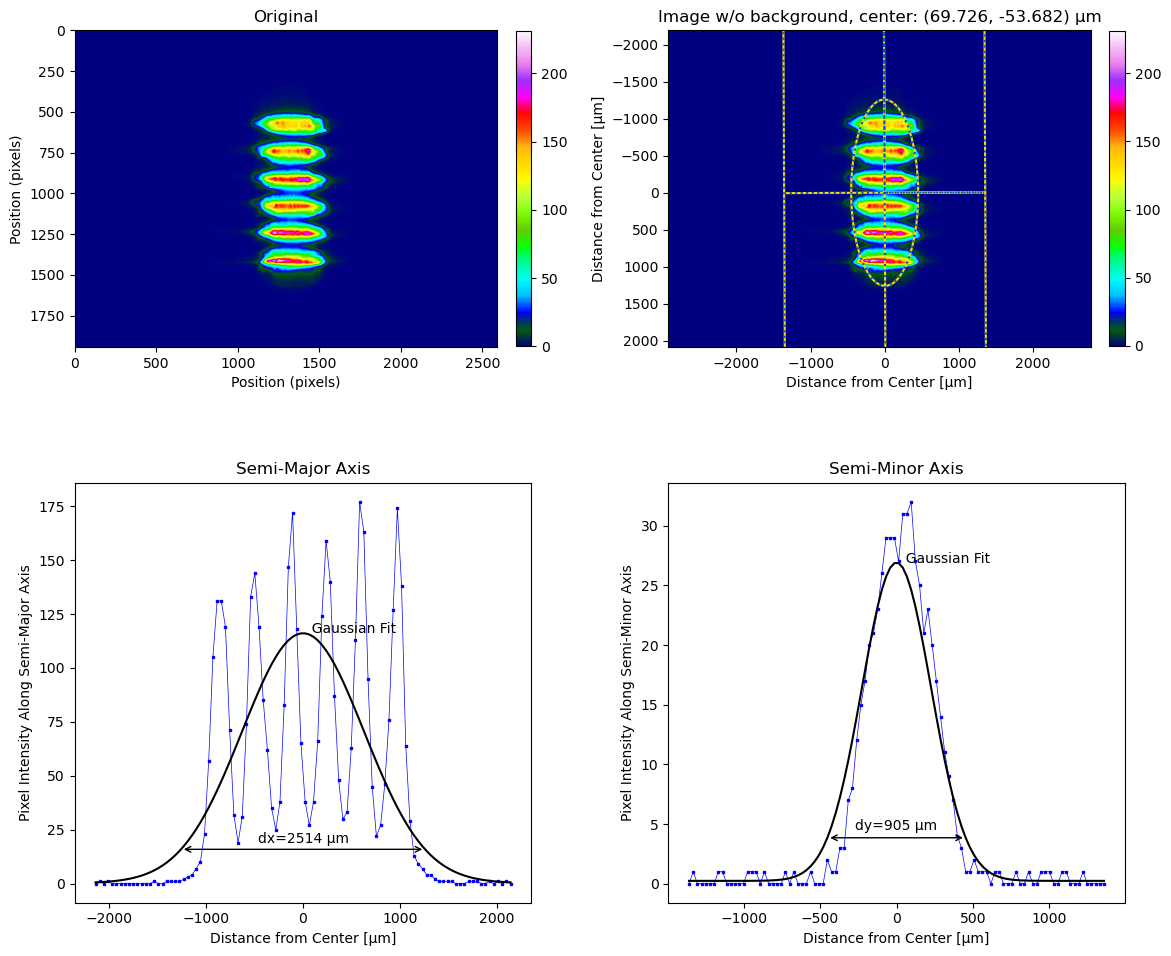

In [2]:
import requests
import sys
import os
# from inspect import getmembers, isfunction
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# Import from this directory so we can rapidly test
sys.path.append('../') # Needed for import
import laserbeamtools as lbs

def load_img(file, folder = r'../tests/test_beam_profiles/DAS'):
    """ Load an image into an array """
    full_path = folder + '/' + file
    if os.path.isfile(full_path):
        iobj = Image.open(full_path)
        img = np.asarray(iobj)
        return img
    else:
        print("No file found under:")
        print(full_path)
        return None

# x, y, dx, dy, phi = lbs.beam_size(img)
# print("The center of the beam ellipse is at (%.0f, %.0f)" % (x, y))
# print("The ellipse diameter (closest to horizontal) is %.0f pixels" % dx)
# print("The ellipse diameter (closest to   vertical) is %.0f pixels" % dy)
# print("The ellipse is rotated %.0f° ccw from the horizontal" % (phi * 180/3.1416))

img = load_img('nf_100_1234.bmp')
lbs.plot_image_analysis(img, pixel_size=2.2)
plt.show()

The center of the beam ellipse is at (174, 164)
The ellipse diameter (closest to horizontal) is 84 pixels
The ellipse diameter (closest to   vertical) is 26 pixels
The ellipse is rotated 33° ccw from the horizontal


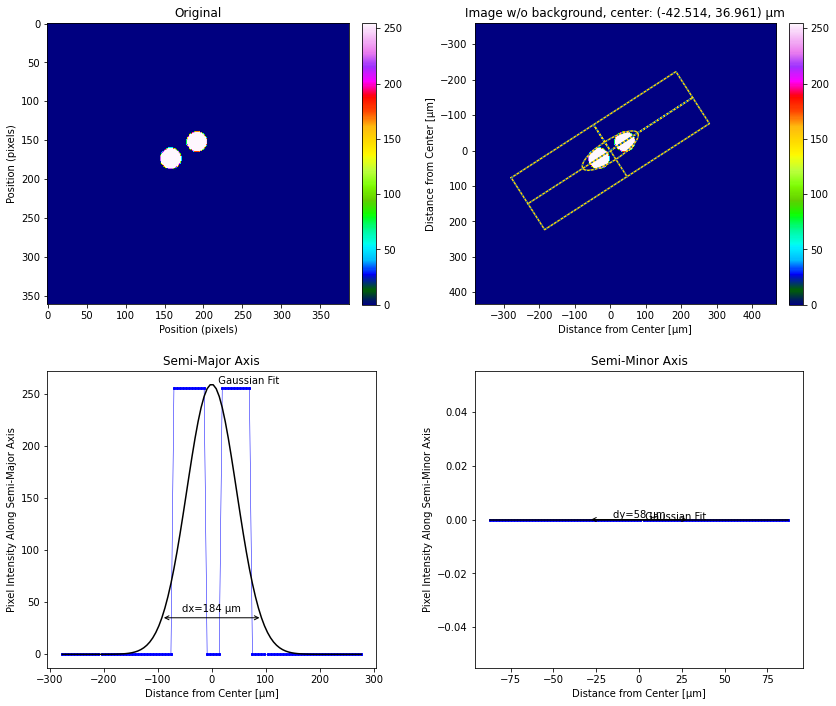

In [4]:

full_path = r'../tests/test_beam_profiles/TST/test.png'
if os.path.isfile(full_path):
    iobj = Image.open(full_path).convert('L')
    img = np.asarray(iobj)

else:
    print("No file found under:")
    print(full_path)


x, y, dx, dy, phi = lbs.beam_size(img)
print("The center of the beam ellipse is at (%.0f, %.0f)" % (x, y))
print("The ellipse diameter (closest to horizontal) is %.0f pixels" % dx)
print("The ellipse diameter (closest to   vertical) is %.0f pixels" % dy)
print("The ellipse is rotated %.0f° ccw from the horizontal" % (phi * 180/3.1416))

lbs.plot_image_analysis(img, pixel_size=2.2)
plt.show()

# DAS Near Field Magnification
---

diameter: 174.000 pixels
diameter: 382.800 um
scalar 0.395


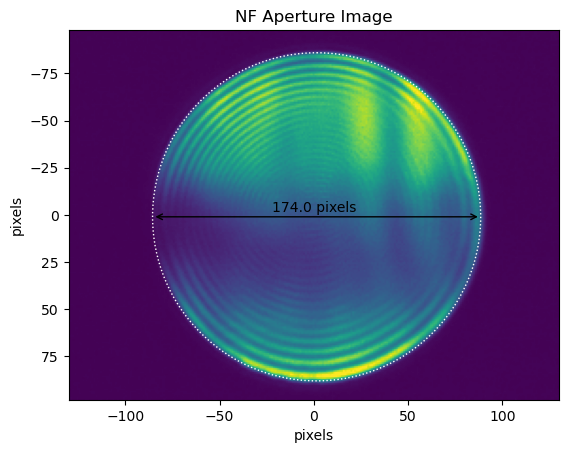

In [3]:

import matplotlib.pyplot as plt
from matplotlib.patches import Circle

img = load_img('nf_aper_post.bmp')

fig, ax = plt.subplots(1)
crop_frac = 0.45
vv,hh = img.shape
vd = int(vv * crop_frac)
hd = int(hh * crop_frac)

v1 = vd
v2 = (vv-vd) 
dv = v2-v1
h1 = hd
h2 = (hh-hd)
dh = h2-h1
img = img[v1:v2, h1:h2]
extent = np.array([-dh/2, dh/2, dv/2, -dv/2])
plt.imshow(img, extent=extent)
radius = 87

xoff = 1.5
yoff = 1

circ = Circle((xoff,yoff), radius, facecolor='None', edgecolor='w', lw=1, linestyle=':')
ax.add_patch(circ)
# plot_knife_edge_analysis(img, pixel_size=2.2, points=200)
plt.title('NF Aperture Image')
plt.xlabel('pixels')
plt.ylabel('pixels')
diameter = radius*2

print('diameter: %.3f pixels' % diameter)
print('diameter: %.3f um' % (diameter*2.2))

ax.annotate('', (-radius + xoff, yoff), (radius + xoff, yoff), arrowprops={'arrowstyle': '<->'})
ax.text(0, 0, "%.1f pixels" % diameter, va='bottom', ha='center')

real_diameter = 968 # um

scalar = (diameter*2.2) / real_diameter

print('scalar %.3f' % scalar)


# Speed Tests
---

In [4]:
import time

img = load_img('nf_100_1234.bmp')

t1 = time.time()
x, y, dx, dy, phi = lbs.beam_size(img)
t2 = time.time()
print("beam_size took %.5f seconds, max fps %.2f" % ((t2-t1), 1/(t2-t1)))
print("The center of the beam ellipse is at (%.0f, %.0f)" % (x, y))
print("The ellipse diameter (closest to horizontal) is %.0f pixels" % dx)
print("The ellipse diameter (closest to   vertical) is %.0f pixels" % dy)
print("The ellipse is rotated %.0f° ccw from the horizontal" % (phi * 180/3.1416))

print()
t1 = time.time()
x, y, dx, dy, phi = lbs.basic_beam_size(img)
t2 = time.time()
print("basic_beam_size took %.5f seconds, max fps %.2f" % ((t2-t1), 1/(t2-t1)))
print("The center of the beam ellipse is at (%.0f, %.0f)" % (x, y))
print("The ellipse diameter (closest to horizontal) is %.0f pixels" % dx)
print("The ellipse diameter (closest to   vertical) is %.0f pixels" % dy)
print("The ellipse is rotated %.0f° ccw from the horizontal" % (phi * 180/3.1416))

beam_size took 0.37726 seconds, max fps 2.65
The center of the beam ellipse is at (1328, 996)
The ellipse diameter (closest to horizontal) is 411 pixels
The ellipse diameter (closest to   vertical) is 1143 pixels
The ellipse is rotated 0° ccw from the horizontal

basic_beam_size took 0.02233 seconds, max fps 44.79
The center of the beam ellipse is at (1321, 995)
The ellipse diameter (closest to horizontal) is 697 pixels
The ellipse diameter (closest to   vertical) is 1203 pixels
The ellipse is rotated 1° ccw from the horizontal


In [5]:
img = load_img('ff_100_1234.bmp')
# crop_frac = 0.4
# vv,hh = img.shape
# vd = int(vv * crop_frac)
# hd = int(hh * crop_frac)
# img = img[vd:(vv-vd), hd:(hh-hd)]

t1 = time.time()
x, y, dx, dy, phi = lbs.beam_size(img)
t2 = time.time()
print("beam_size took %.5f seconds, max fps %.2f" % ((t2-t1), 1/(t2-t1)))
print("The center of the beam ellipse is at (%.0f, %.0f)" % (x, y))
print("The ellipse diameter (closest to horizontal) is %.0f pixels" % dx)
print("The ellipse diameter (closest to   vertical) is %.0f pixels" % dy)
print("The ellipse is rotated %.0f° ccw from the horizontal" % (phi * 180/3.1416))

print()
t1 = time.time()
x, y, dx, dy, phi = lbs.basic_beam_size(img)
t2 = time.time()
print("basic_beam_size took %.5f seconds, max fps %.2f" % ((t2-t1), 1/(t2-t1)))
print("The center of the beam ellipse is at (%.0f, %.0f)" % (x, y))
print("The ellipse diameter (closest to horizontal) is %.0f pixels" % dx)
print("The ellipse diameter (closest to   vertical) is %.0f pixels" % dy)
print("The ellipse is rotated %.0f° ccw from the horizontal" % (phi * 180/3.1416))

beam_size took 0.30571 seconds, max fps 3.27
The center of the beam ellipse is at (1292, 952)
The ellipse diameter (closest to horizontal) is 1538 pixels
The ellipse diameter (closest to   vertical) is 1154 pixels
The ellipse is rotated 0° ccw from the horizontal

basic_beam_size took 0.01896 seconds, max fps 52.75
The center of the beam ellipse is at (1292, 952)
The ellipse diameter (closest to horizontal) is 1538 pixels
The ellipse diameter (closest to   vertical) is 1154 pixels
The ellipse is rotated 0° ccw from the horizontal
